In [1]:
import torch
import torchvision
import time
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# hyperparamters
input_dim = 784
output_dim = 10
hidden_dim = 100
learning_rate = 0.001
n_epochs = 10
verbose = True
batch_size = 1000

In [3]:
# Check if your device include GPU to use or not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Load MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root = './data', download=True, train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root = './data', download=True, train = False, transform=transforms.ToTensor())

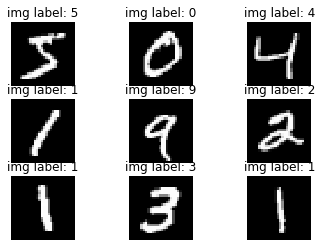

In [5]:
# Display Examples
examles, labels = train_dataset.data[:9], train_dataset.targets[:9]
for i, (img) in enumerate(examles):
    plt.subplot(3, 3, i + 1)
    plt.title(f'img label: {labels[i]}')
    plt.imshow(img, cmap='gray')
    plt.axis(False)
# End For

In [6]:
# Initialize Data Loaders
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [7]:
# Initialize our Network: input => hidden => output
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
    # End Func
    
    def forward(self, input):
        out = torch.relu(self.layer_1(input))
        out = self.layer_2(out)
        return out
    # End Func
# End Class

In [8]:
# intitalize our model meta 
nn_model = NeuralNetwork(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(nn_model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [9]:
# train our model
n_steps = len(train_loader)
train_loss = []
for epoch in range(n_epochs):
    for i, (x, y) in enumerate(train_loader):
        x = x.reshape(-1, input_dim).to(device)
        y_hat = nn_model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if verbose == True:
            end = "\n" if ((i + 1) % n_steps == 0) else "\r"
            print(f'Epochs: [{epoch + 1}/{n_epochs}], Step: [{i + 1}/{n_steps}], Loss = {loss.item():.4f}', end = end, flush=True)
            time.sleep(0.15)
        # End If
    # End For
    train_loss.append(loss.item())
# End For

Epochs: [1/10], Step: [60/60], Loss = 0.4631
Epochs: [2/10], Step: [60/60], Loss = 0.3147
Epochs: [3/10], Step: [60/60], Loss = 0.2501
Epochs: [4/10], Step: [60/60], Loss = 0.2219
Epochs: [5/10], Step: [60/60], Loss = 0.2523
Epochs: [6/10], Step: [60/60], Loss = 0.1871
Epochs: [7/10], Step: [60/60], Loss = 0.1730
Epochs: [8/10], Step: [60/60], Loss = 0.1435
Epochs: [9/10], Step: [60/60], Loss = 0.1458
Epochs: [10/10], Step: [60/60], Loss = 0.1659


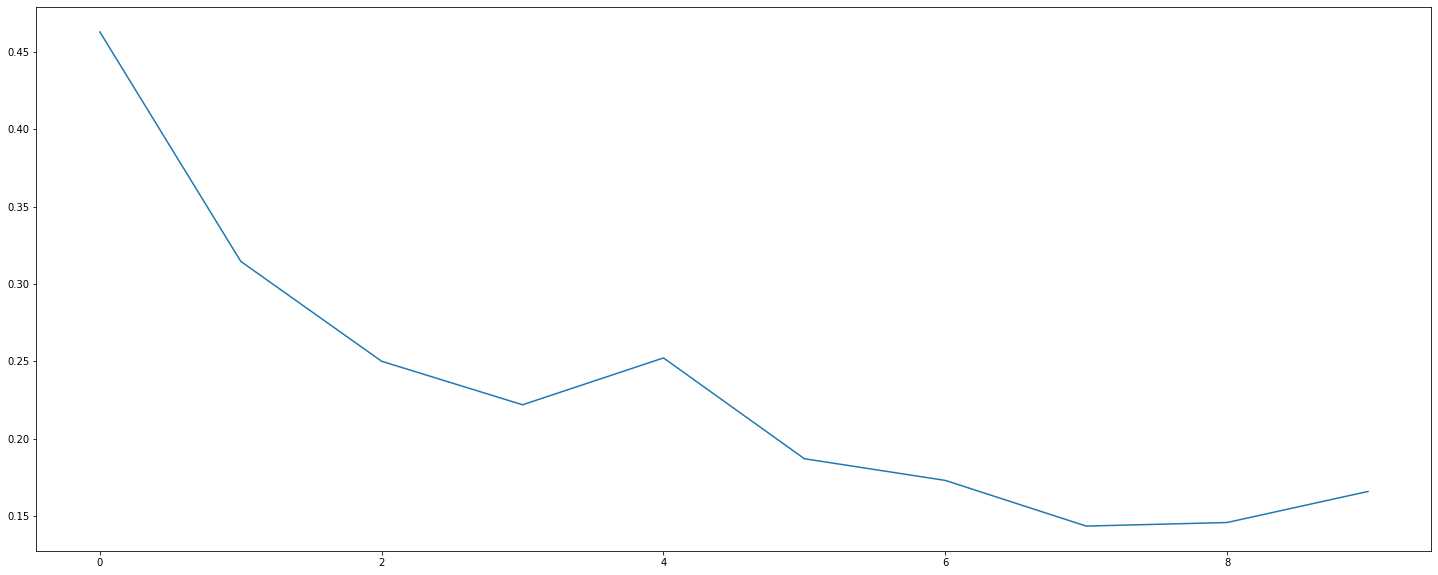

In [10]:
plt.figure(figsize=[25, 10])
plt.plot(train_loss)

In [11]:
X_test, y_test = test_dataset.data.reshape(-1, input_dim).type(torch.float32), test_dataset.targets

In [12]:
_, preds = nn.Softmax(dim = 1)(nn_model(X_test).detach()).max(dim = 1)
acc = ((preds == y_test).sum() * 100 / len(y_test)).item() 
print(f'model accuracy: {acc:.2f}%')

model accuracy: 95.35%
